In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [3]:
data = datasets.load_iris( as_frame = True)

In [4]:
X = data['data']

In [5]:
y = data['target']

In [6]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
#Scaling the data 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Models

### K-Nearest Neighbors (KNN)

In [8]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
y_pred = knn.predict(X_test_scaled)

In [10]:
accuracy_score(y_test, y_pred)

1.0

In [11]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n\n\n')
print(f'{"Classification Report:".center(60)}\n{classification_report(y_test, y_pred)}')

Accuracy: 1.0



                   Classification Report:                   
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Logistic Regression, SVM , Decision Tree, Random Forest 

In [12]:
## Testing other classification models 

model = {
    'Logistic Regression':LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
    
}

for name, model in model.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.3f}")
    

Logistic Regression Accuracy: 1.000
SVM Accuracy: 1.000
Decision Tree Accuracy: 1.000
Random Forest Accuracy: 1.000


### Feature Importance 


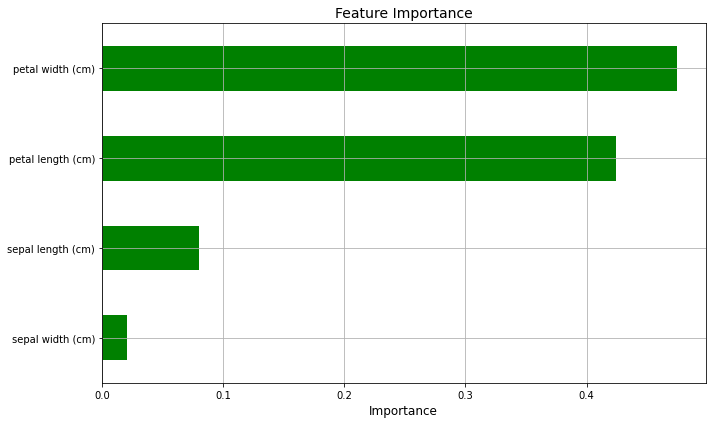

In [13]:
## Random Forest Classifier to see the Feature importance

rf = RandomForestClassifier()
rf.fit(X, y)

importance = pd.Series(rf.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
importance.sort_values().plot(kind='barh', color='green')
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()